# 다항 선형 회귀에 대한 경사 하강법의 원리 : 집값 예측

## 1. 집값 데이터 읽기

In [1]:
import numpy as np
import pandas as pd

data = pd.read_csv("house_price_us.txt", names=['size', 'n_room', 'price'])
data.head()

,size,n_room,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [2]:
X = np.c_[data['size'], data['n_room']]
y = data['price']
m = len(data)

In [3]:
X = np.array(X).reshape(m, 2)
y = np.array(y).reshape(m, 1)

print(X.shape, y.shape)

(47, 2) (47, 1)


## 2. 그래프 그리기

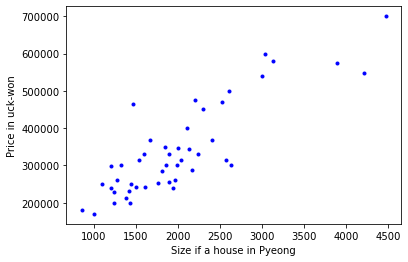

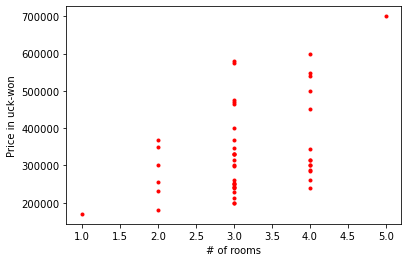

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(X[:,0].reshape(-1), y, 'b.')
plt.xlabel("Size if a house in Pyeong")
plt.ylabel("Price in uck-won")
plt.show()

plt.plot(X[:, 1].reshape(-1), y, 'r.')
plt.xlabel("# of rooms")
plt.ylabel("Price in uck-won")
plt.show()

## 3. Feature Scailing (Noramlization)
## $ X_i = \frac{X - \mu_X}{\sigma_x}$

In [5]:
def featureNormalization(X):
    mu = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    
    X_norm = (X - mu) / std
    
    return X_norm, mu, std

In [6]:
X, mu_X, std_X = featureNormalization(X)
y, mu_y, std_y = featureNormalization(y)

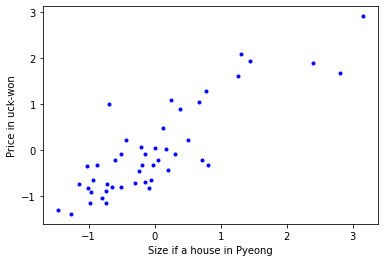

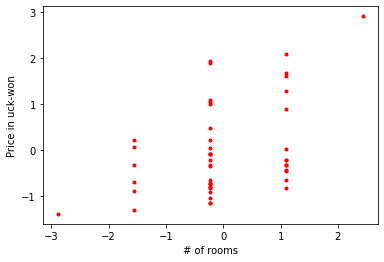

In [7]:
plt.plot(X[:,0].reshape(-1), y, 'b.')
plt.xlabel("Size if a house in Pyeong")
plt.ylabel("Price in uck-won")
plt.show()

plt.plot(X[:, 1].reshape(-1), y, 'r.')
plt.xlabel("# of rooms")
plt.ylabel("Price in uck-won")
plt.show()

## 4. Gradient Descent -> $\theta$

In [8]:
# X tensor에 bias term 추가
# np.c_ : concatenation
X_b = np.c_[np.ones((m, 1)), X]

learning_rate = 1e-2
epochs = 400

# randomly initialize
theta = np.random.randn(3, 1)
gradients = np.zeros((3, 1))

# train
for epoch in range(epochs):
    gradients = 2.0 / m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - learning_rate * gradients

print(f"theta: {theta}")

theta: [[ 2.12336376e-04]
 [ 8.98388542e-01]
 [-6.68079707e-02]]


## 5. 임의의 집 크기 (x_my) 에 대한 집값 예측하기

In [9]:
# 우리집이 25평이라면, 얼마일까? 25평 -> 890 피트 제곱
X_mine = np.array([890, 2])
X_mine = (X_mine - mu_X) / std_X
print(X_mine.shape)

X_mine_b = np.c_[np.ones((1, 1)), X_mine.reshape(1, 2)]
y_predict = X_mine_b.dot(theta)
y_predict = std_y * y_predict + mu_y
print(y_predict)

(2,)
[[196285.6510142]]


## 6. 반복 횟수에 따른 비용함수 J($\theta$) 그리기

In [10]:
def ComputeJ(theta, X, y):
    m = len(X)
    X_b = np.c_[np.ones((m, 1)), X]
    theta = np.array(theta)
    
    cost = X_b.dot(theta) - y
    cost = cost.reshape(-1)
    
    cost2 = np.square(cost)
    cost_sum = np.sum(cost2) / (2*m)
    
    return cost_sum

theta: [[-9.01511588e-05]
 [ 8.87884344e-01]
 [-5.62971942e-02]]


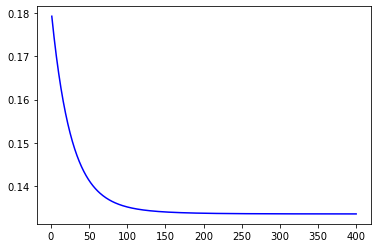

In [11]:
# X tensor에 bias term 추가
# np.c_ : concatenation
X_b = np.c_[np.ones((m, 1)), X]

learning_rate = 1e-2
epochs = 400

# randomly initialize
theta = np.random.randn(3, 1)
gradients = np.zeros((3, 1))

# train
cost_arr = []
for epoch in range(epochs):
    gradients = 2.0 / m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - learning_rate * gradients
    cost_arr.append(ComputeJ(theta, X, y))
    
print(f"theta: {theta}")
plt.plot(range(1, epochs+1), cost_arr, 'b-')